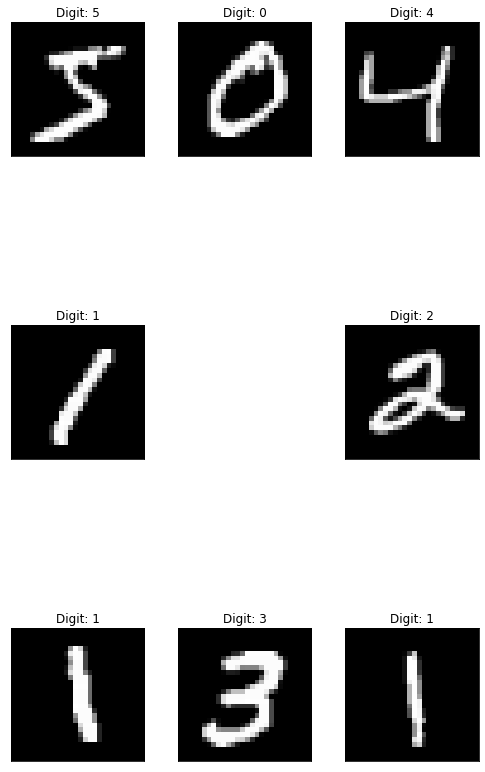

In [10]:
import os
#import packages
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
#import data
from keras.datasets import mnist #already downloaded the data in cache using "python -c 'from keras.datasets import mnist mnist.load_data()"
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np



#data processing
#Load the data and split it into train and test sets
#X_train (the variable that contains the images to train on) , y_train (the variable that contains the labels of the images in the training set), X_test (the variable that contains the images to test on), and the y_test (the variable that contains the labels of the images in the test set).
(X_train,y_train), (X_test, y_test) = mnist.load_data()

fig = plt.figure() 
for i in range(9):  #A quick overview of the dataset images
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    fig  
#prints the images of the handwritten digits

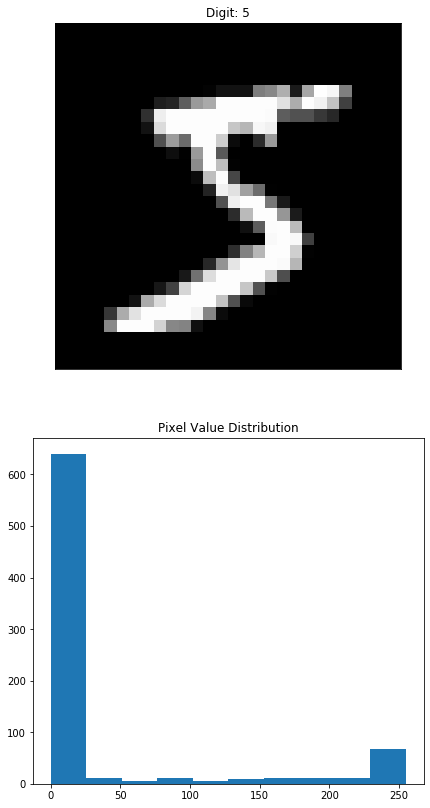

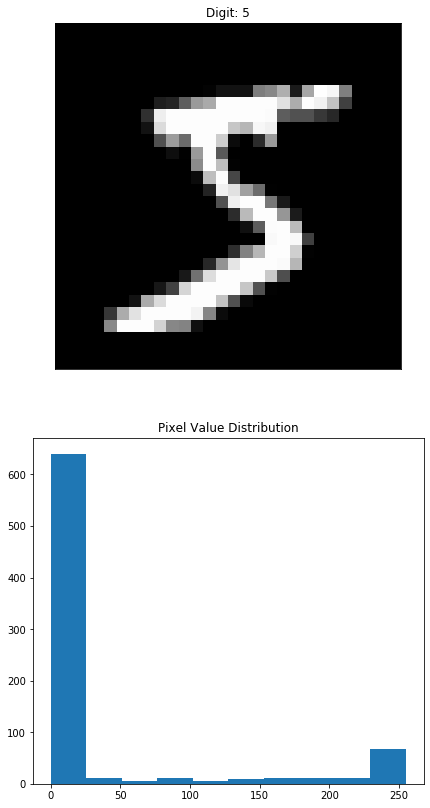

In [11]:

# to train our neural network to classify images we first have to unroll the height width pixel format into one big vector - the input vector. So its length must be . But let's graph the distribution of our pixel values.
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig
#note that,  the background majority close to 0, and those close to 255 representing the digit.


In [12]:
#Normalizing the input data helps to speed up the training. Also, it reduces the chance of getting stuck in local optima, since we're using stochastic gradient descent to find the optimal weights for the network.

#Let's reshape our inputs to a single vector vector and normalize the pixel values to lie between 0 and 1.


# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape) 
print("y_test shape", y_test.shape)

print("first image as an array", X_train[0])
print("first image label", y_train[0])

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
first image as an array [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253

In [14]:
#Reshape to fit the model, the training feature set will have 60,000 rows of 28 x 28 pixel images with depth=1 (gray scale) and the test feature set will have 10,000 rows of 28 x 28 pixel images with depth=1 (gray scale).
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

#the truth (Y in machine learning lingo) we'll use for training still holds integer values from 0 to 9.

print(np.unique(y_train, return_counts=True))
#we will use hot encoding to make it easier
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
#converting these data sets into a set of 10 numbers to input into the neural network.
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
print("The label 5 after one-hot encoding", Y_train[0]) #which is labeled as 

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
The label 5 after one-hot encoding [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
#building the network
#By the input layer 28x28=784, layer 1= 512 nodes, layer 2=512 nodes (the two are hidden), the output layer 10 nodes, from 0 to 9.
# building a linear stack of layers with the sequential model

#adding activations for every layer
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu')) #activation functions to the hidden layers, for non linear
model.add(Dropout(0.2)) #to prevent overfitting

model.add(Dense(10))  # densely-connected
model.add(Activation('softmax')) #to map the non-normalized output of a network to a probability distribution over predicted output classes.
#That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval {\displaystyle (0,1)}(0,1), and the components will add up to 1, so that they can be interpreted as probabilities.
#used in the final layer of a neural network-based classifier. Such networks are commonly trained under a log loss (or cross-entropy) regime, giving a non-linear variant of multinomial logistic regression.
#Since the function maps a vector and a specific index i to a real value, 




#compile fit and evaluate 

# compiling the sequential model, and storing the model weights 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
print("Model Compiled")

Model Compiled


In [18]:
#Training the model
# training the model and saving metrics in history
#epochs= how many times we will want it to iterate
#batch size= how many samples
history = model.fit(X_train, Y_train, batch_size=128, epochs=20,verbose=2, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 5s - loss: 0.8316 - accuracy: 0.7465 - val_loss: 0.3733 - val_accuracy: 0.8893
Epoch 2/20
 - 5s - loss: 0.3531 - accuracy: 0.8949 - val_loss: 0.2797 - val_accuracy: 0.9161
Epoch 3/20
 - 5s - loss: 0.2766 - accuracy: 0.9183 - val_loss: 0.2278 - val_accuracy: 0.9318
Epoch 4/20
 - 5s - loss: 0.2260 - accuracy: 0.9324 - val_loss: 0.1915 - val_accuracy: 0.9428
Epoch 5/20
 - 5s - loss: 0.1913 - accuracy: 0.9426 - val_loss: 0.1594 - val_accuracy: 0.9520
Epoch 6/20
 - 5s - loss: 0.1646 - accuracy: 0.9506 - val_loss: 0.1444 - val_accuracy: 0.9567
Epoch 7/20
 - 5s - loss: 0.1441 - accuracy: 0.9562 - val_loss: 0.1278 - val_accuracy: 0.9594
Epoch 8/20
 - 5s - loss: 0.1263 - accuracy: 0.9619 - val_loss: 0.1165 - val_accuracy: 0.9632
Epoch 9/20
 - 5s - loss: 0.1123 - accuracy: 0.9660 - val_loss: 0.1063 - val_accuracy: 0.9672
Epoch 10/20
 - 5s - loss: 0.1011 - accuracy: 0.9697 - val_loss: 0.0983 - val_accuracy: 0.9690
Epoch 11/20
 - 5s -

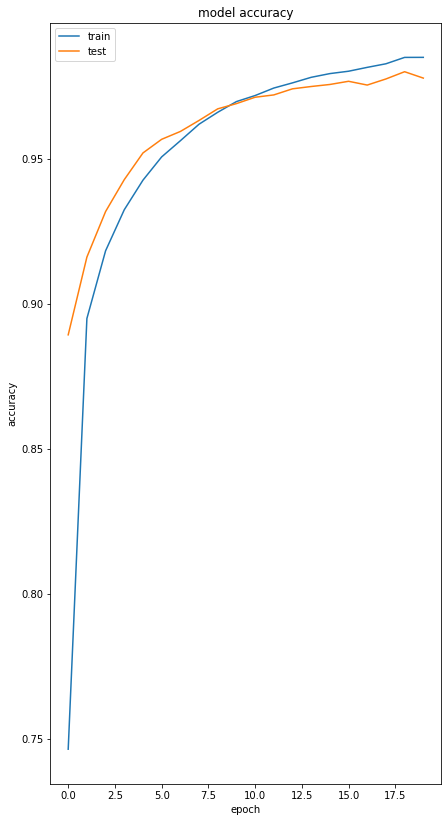

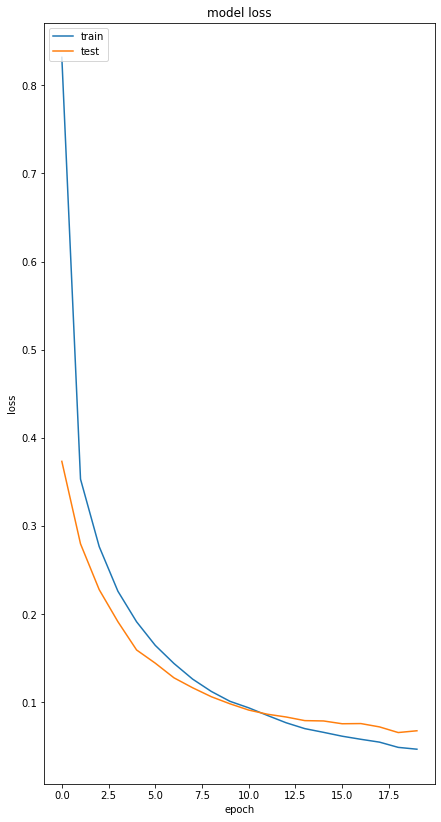

In [20]:
#Plotting the metrics of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Plotting the metrics of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [22]:
# saving the model
model.save("kerasmodel.h5")
print("saved the model to disk")
#will be saved in the place of the code

saved the model to disk


In [27]:

#evaluating the model's perfomance
mnist_model = load_model("kerasmodel.h5")
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

testloss=loss_and_metrics[0]
testacc=loss_and_metrics[1]
print("The test loss is: "+"{:.2%}".format(testloss));
print("The test accuracy is: "+"{:.2%}".format(testacc));

The test loss is: 6.77%
The test accuracy is: 97.78%


In [39]:
predicted_classes = mnist_model.predict_classes(X_test)


# getting the numbers of the percentages above (the loss and the accuracy metrics)
pcorrect = np.nonzero(predicted_classes == y_test)[0]
pincorrect = np.nonzero(predicted_classes != y_test)[0]


9778  which are classified correctly


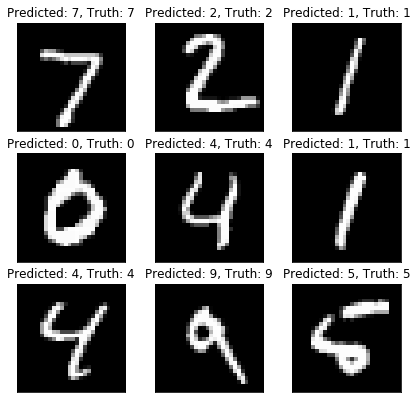

In [41]:
print()
print(len(pcorrect)," which are classified correctly")
# plot 9 correct predictions
for i, correct in enumerate(pcorrect[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])



222  which are classified incorrectly


<Figure size 504x1008 with 0 Axes>

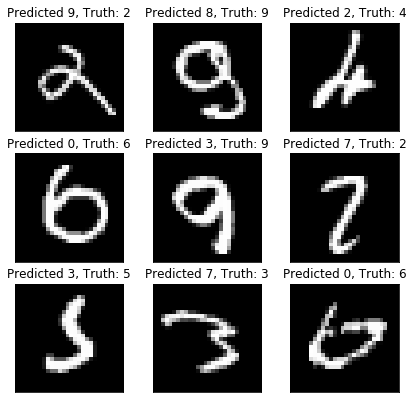

In [42]:

print(len(pincorrect)," which are classified incorrectly")
# plot 9 incorrect predictions
for i, incorrect in enumerate(pincorrect[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation